In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr
import autograd.scipy.stats.norm as norm

from viabel.vb import mean_field_t_variational_family
from experiments import run_experiment

import seaborn as sns

sns.set_style('white')
sns.set_context('notebook', font_scale=2, rc={'lines.linewidth': 2})

The `run_experiment` function in `experiments.py` makes it easy to run black box KLVI and CHIVI on a model of interest, compute improved Monte Carlo estimates using Pareto-smoothed importance sampling (PSIS), and then compare all of these estimates (that is, KLVI and CHIVI with and without PSIS) to the ground truth mean and covariance.

As a simple example, we consider Neal's funnel distribution in 2 dimensions so that we can visualize the results. 

In [2]:
D = 2
log_sigma_stdev = 1.35
def log_density(x):
    mu, log_sigma = x[:, 0], x[:, 1]
    sigma_density = norm.logpdf(log_sigma, 0, log_sigma_stdev)
    mu_density = norm.logpdf(mu, 0, np.exp(log_sigma))
    return sigma_density + mu_density

true_mean = np.zeros(2)
true_cov = np.diag(np.array([np.exp(2*log_sigma_stdev**2), log_sigma_stdev**2]))
print('true mean   =', true_mean)
print('true stdevs =', np.sqrt(np.diag(true_cov)))

true mean   = [0. 0.]
true stdevs = [6.1873074 1.35     ]


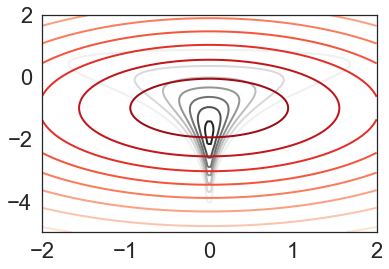

|--------------|
|     KLVI     |
|--------------|


Average Loss = 3.658: 100%|██████████| 10000/10000 [00:20<00:00, 482.03it/s]    


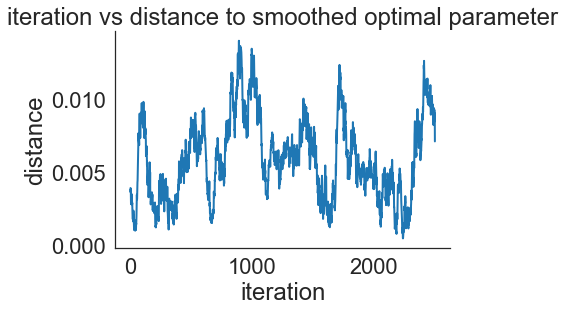

mean   = [-0.00036149  0.00195511]
stdevs = [0.67525095 0.63280272]

mean error             = 0.00199
stdev error            = 5.56
||cov error||_2^{1/2}  = 6.15
||true cov||_2^{1/2}   = 6.19

Computing CUBO and ELBO with 1000000 samples took 1.085 sec to run

Bounds on...
  2-Wasserstein   19.2
  2-divergence    8.62
  mean error      19.2
  stdev error     19.2
  sqrt cov error  27.6
  cov error       763


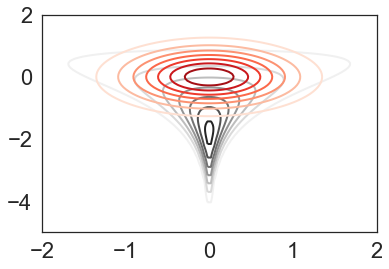


Results with PSIS correction
----------------------------
khat = 0.768

mean   = [ 0.02966654 -0.23862595]
stdevs = [1.14583899 1.08419279]

mean error             = 0.24
stdev error            = 5.05
||cov error||_2^{1/2}  = 6.08
||true cov||_2^{1/2}   = 6.19

|---------------|
|     CHIVI     |
|---------------|


/Users/jhuggins/Desktop/viabel/notebooks/psis.py:295: RuntimeWarning: overflow encountered in exp
  np.exp(temp, out=temp)
Average Loss = 0.49248: 100%|██████████| 10000/10000 [00:54<00:00, 183.61it/s]


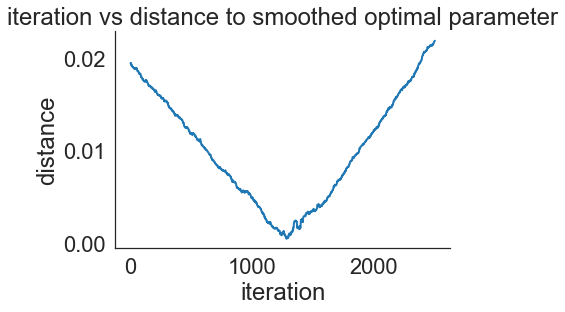

mean   = [ 0.03402025 -0.83633643]
stdevs = [0.77373775 1.30939186]

mean error             = 0.837
stdev error            = 5.41
||cov error||_2^{1/2}  = 6.14
||true cov||_2^{1/2}   = 6.19

Computing CUBO and ELBO with 1000000 samples took 680.712 millisec to run

Bounds on...
  2-Wasserstein   18.5
  2-divergence    6.37
  mean error      18.5
  stdev error     18.5
  sqrt cov error  27
  cov error       731


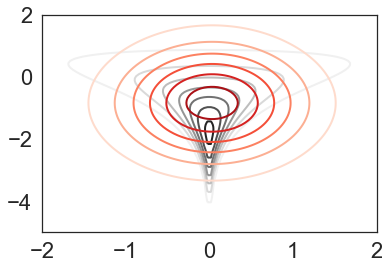


Results with PSIS correction
----------------------------
khat = 0.894

mean   = [ 0.10880328 -0.23304471]
stdevs = [1.40194483 1.17549585]

mean error             = 0.257
stdev error            = 4.79
||cov error||_2^{1/2}  = 6.03
||true cov||_2^{1/2}   = 6.19


/Users/jhuggins/Desktop/viabel/notebooks/psis.py:295: RuntimeWarning: overflow encountered in exp
  np.exp(temp, out=temp)
/Users/jhuggins/Desktop/temp-env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [3]:
mean_field_t = mean_field_t_variational_family(D, 40)
init_mean    = np.array([0, -1])
init_log_std = np.ones(D)
init_param = np.concatenate([init_mean, init_log_std])
klvi, chivi, klvi_results, chivi_results, other_klvi_results, other_chivi_results = \
    run_experiment(log_density, mean_field_t, init_param, true_mean, true_cov, 
                   learning_rate=.01, learning_rate_end=.001,
                   n_iters=10000, bound_w2=1000000, verbose=True,
                   contour_kws=dict(xlim=[-2,2], ylim=[-5,2]))